#### Importing libraries

In [ ]:
!pip install --upgrade kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### Generating sample data

In [ ]:
 features, true_labels = make_blobs( 
     n_samples =200,
     centers=3,
     cluster_std=2.75,
     random_state=42
 )

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

#### Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[0.94797035, 0.55372575],
       [0.12673452, 0.83900717],
       [0.2447589 , 0.10346464],
       [0.07833255, 0.05342012],
       [0.17786579, 0.27480722]])

#### K-means implementation

In [ ]:
kmeans = KMeans(init="random", n_clusters=3,
                n_init=10, max_iter=300, random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
# The lowest SSE value
kmeans.inertia_

4.077448410405182

In [ ]:
#Location of the centroid
kmeans.cluster_centers_

array([[0.73435516, 0.52300439],
       [0.41031722, 0.75482568],
       [0.26314444, 0.19745615]])

In [ ]:
# The number of interations takes place
kmeans.n_iter_

7

In [ ]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [ ]:
correct_labels= sum(true_labels == kmeans.labels_)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, true_labels.size))

Result: 67 out of 200 samples were correctly labeled.


#### Choosing the optimize Number of Clusters

###### Applying elbow method

In [ ]:
kmeans_kwargs = {
    "init":"random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42, 
    }

sse=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

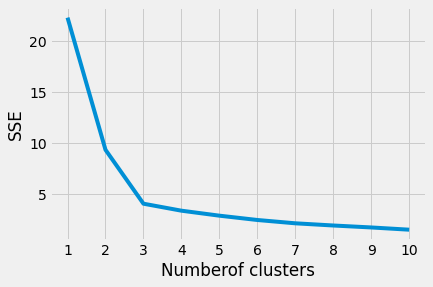

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1,11))
plt.xlabel("Numberof clusters")
plt.ylabel("SSE")


In [ ]:
# From above plot , we can observe the elbow point to be 3 so it will be the optimal number of clusters
#but we can also do it programatically using kneed package
k = KneeLocator(range(1,11),sse, curve="convex", direction="decreasing")
k.elbow

3

### Mall Customers Segmentation using K-means clustering

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Mall_Customers.csv')

In [5]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking Descriptive Statistics

In [6]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


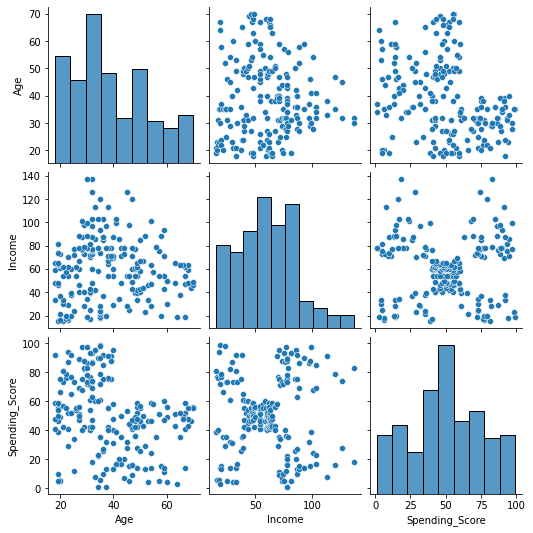

In [7]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Age','Income', 'Spending_Score']])

In [8]:
df_short =df[['Income','Spending_Score']]
df_short

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Elbow Method to Identify the optimal number of Clusters

In [9]:
import sklearn.cluster as cluster
K=range(1,12)
wcss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++",random_state= 42)
    kmeans=kmeans.fit(df_short)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [10]:
#Storing the wcss for different clusters 
mycenters = pd.DataFrame({'Clusters' : K, 'WCSS' : wcss})
mycenters

,Clusters,WCSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37265.865205
6,7,30241.343618
7,8,25336.946861
8,9,21850.165283
9,10,19634.554629


Text(0, 0.5, 'WCSS')

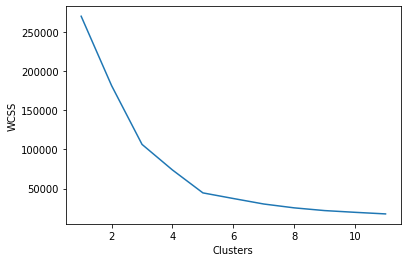

In [11]:
plt.plot(mycenters["Clusters"], mycenters["WCSS"])
plt.xlabel("Clusters")
plt.ylabel("WCSS")

####  Silhouette Method to Identify Clusters

In [12]:
import sklearn.metrics as metrics

for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.53976103063432
Silhouette score for k(clusters) = 7 is 0.5288104473798049
Silhouette score for k(clusters) = 8 is 0.4572211842776841
Silhouette score for k(clusters) = 9 is 0.45819645551960536
Silhouette score for k(clusters) = 10 is 0.45275118302579015
Silhouette score for k(clusters) = 11 is 0.4506640486267676
Silhouette score for k(clusters) = 12 is 0.43912977729141867


#### Perform K-Mean Clustering with 5 Clusters

In [13]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [19]:
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

#### Attach Clusters to the Original Data 

In [14]:
df['Clusters'] = kmeans.labels_

In [15]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [16]:
df['Clusters'].value_counts()

1    81
2    39
4    35
0    23
3    22
Name: Clusters, dtype: int64

In [17]:
df.to_csv('mallClusters.csv', index = False)

####  Visualizing Clusters 

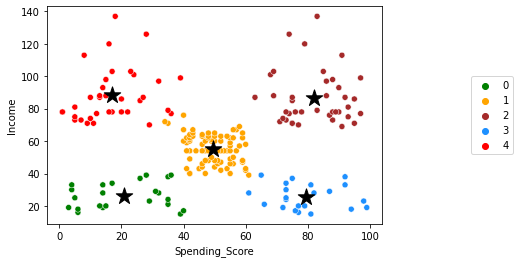

In [18]:
g=sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df, palette=['green','orange','brown','dodgerblue','red'])
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid', marker="*")  